<a href="https://colab.research.google.com/github/maslovalyudmila/ds_school_2020/blob/master/Maslova_4dTask_ABitCorrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [0]:
# import our data

df = pd.read_csv('/content/houses_to_rent_v2.csv')

**Preprocessing the data**

In [0]:
# create a binary column with target variable 'best demand'

df['best demand'] = df['total (R$)']
df_1 = df['best demand']
df_1.loc[df_1 <= 3580] = 1
df_1.loc[df_1 > 3580] = 0

In [0]:
# make categorical features as quantitive

from sklearn.preprocessing import LabelEncoder

df['animal'] = df['animal'].factorize()[0]
df['furniture'] = df['furniture'].factorize()[0]

labelencoder = LabelEncoder()
df.city = labelencoder.fit_transform(df.city)
df.floor = labelencoder.fit_transform(df.floor)

In [0]:
# delete hierarchy

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[('city', OneHotEncoder(), [0,4])])
transformer = ColumnTransformer(transformers=[('floor', OneHotEncoder(), [0,34])])

In [0]:
# read first 5 rows of data

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),best demand
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618,0
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973,0
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841,0
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421,1
4,4,25,1,1,0,1,1,1,0,800,25,11,836,1


In [0]:
dataset = df.drop(['total (R$)'], axis=1).values

In [0]:
dataset

array([[   4,   70,    2, ...,  211,   42,    0],
       [   4,  320,    4, ..., 1750,   63,    0],
       [   2,   80,    1, ...,    0,   41,    0],
       ...,
       [   3,   70,    3, ...,  332,   78,    0],
       [   3,  120,    2, ...,  279,  155,    0],
       [   4,   80,    2, ...,  165,   22,    1]])

In [0]:
X = dataset[:, 0:12] # first 11 rows 
Y = dataset[:, 12] # 12th column

In [0]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_scale = standard_scaler.fit_transform(X)

In [0]:
X_scale

array([[ 0.75256677, -0.14752165, -0.432099  , ..., -0.17493534,
        -0.05010297, -0.23658936],
       [ 0.75256677,  0.31803478,  1.27553453, ...,  0.31209868,
         0.44512065,  0.20305577],
       [-0.64949698, -0.12889939, -1.28591577, ..., -0.32163234,
        -0.11799913, -0.25752484],
       ...,
       [ 0.05153489, -0.14752165,  0.42171777, ...,  0.61722843,
        -0.01116726,  0.51708801],
       [ 0.05153489, -0.05441036, -0.432099  , ...,  2.37759236,
        -0.02822175,  2.12912015],
       [ 0.75256677, -0.12889939, -0.432099  , ..., -0.73238392,
        -0.06490498, -0.655299  ]])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
Y_train = Y_train.reshape(7484, 1)
Y_test = Y_test.reshape(3208, 1)

In [0]:
# make random weights more certain

np.random.seed(1)

In [0]:
# define input and output values

x = X_train 
y = Y_train 

**Building and training the Neural Network**

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([Dense(64, activation='sigmoid', input_shape=(12,)), Dense(1, activation='sigmoid'),])

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size=64, epochs=1000, validation_data=(X_test, Y_test))

Train on 7484 samples, validate on 3208 samples
Epoch 1/1000
7484/7484 [==============================] - 0s 23us/step - loss: 0.1005 - accuracy: 0.9578 - val_loss: 0.0973 - val_accuracy: 0.9607
Epoch 2/1000
7484/7484 [==============================] - 0s 21us/step - loss: 0.1004 - accuracy: 0.9576 - val_loss: 0.0972 - val_accuracy: 0.9607
Epoch 3/1000
7484/7484 [==============================] - 0s 22us/step - loss: 0.1003 - accuracy: 0.9578 - val_loss: 0.0972 - val_accuracy: 0.9604
Epoch 4/1000
7484/7484 [==============================] - 0s 22us/step - loss: 0.1003 - accuracy: 0.9579 - val_loss: 0.0971 - val_accuracy: 0.9607
Epoch 5/1000
7484/7484 [==============================] - 0s 22us/step - loss: 0.1002 - accuracy: 0.9580 - val_loss: 0.0971 - val_accuracy: 0.9607
Epoch 6/1000
7484/7484 [==============================] - 0s 22us/step - loss: 0.1002 - accuracy: 0.9575 - val_loss: 0.0970 - val_accuracy: 0.9607
Epoch 7/1000
7484/7484 [==============================] - 0s 22us/step

In [0]:
model.evaluate(X_test, Y_test)[1]

3208/3208 [==============================] - 0s 22us/step


0.9784912467002869

In [0]:
import matplotlib.pyplot as plt

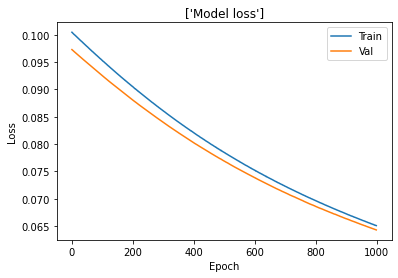

In [0]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(['Model loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

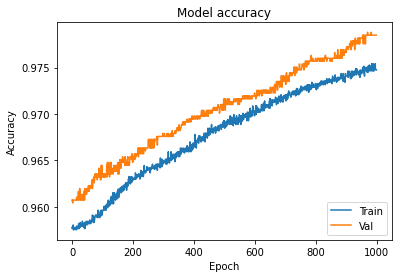

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Conclusion:**

Two neural networks of the same architecture were tested in Task 3 and Task 4. The architecture included: 

*   input layer: 12 neurons
*   hidden layer: 64 neurons
*   output layer: 1 neuron

It is a binary classification task, our target variable was best demand value - 1 (middle-priced houses of basic convenience) or 0 (houses out of this category). So our neural networks were supposed to predict true values in output. 

Our choice of activation function to use based on the type of the task, therefore sigmoid was chosen. And in continue the loss function (binary cross entropy) which should have estimated the accuracy of neural network training.

The first neural network (NN) was built using simply Python, in the second we used Keras. As we can see, Keras provided more accurate results. In first case loss value was about 16 which is bad result and says that quantity or true values predicted by NN is far from expected. But in the second case we observed the opposite result as validation data loss is about 0,06 and accuracy score is about 0,97. 

Also it can by said that loss value and accuracy score depend on epoch length. Loss is decreasing while the epoch is raising. And, vice versa, accuracy is raising while epoch length is raising too.



